In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [6]:
df = pd.read_csv('weather_day.csv')
df = df[['dteday', 'cnt']].dropna()

df['dteday'] = pd.to_datetime(df['dteday'])
df = df.set_index('dteday')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

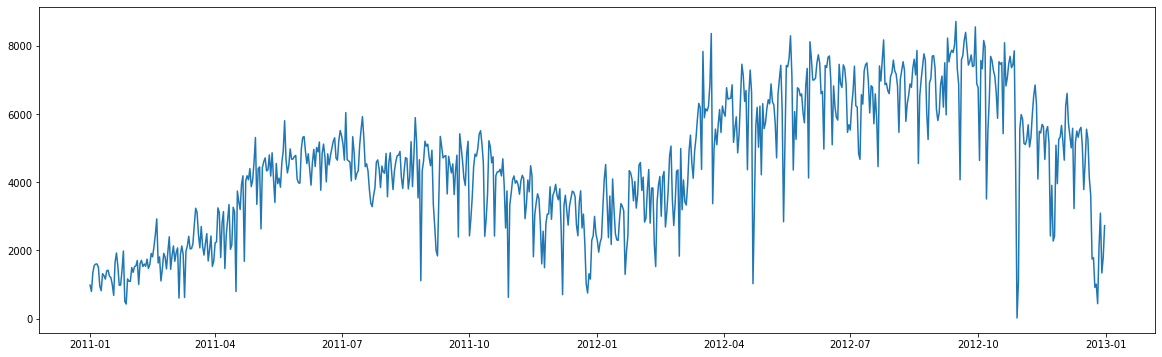

In [7]:
d_df.columns = ['ds', 'y']

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [8]:
m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=10)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
726,2012-12-27,3962.433854,2649.984264,5234.753030
727,2012-12-28,4001.737735,2713.524887,5206.362505
728,2012-12-29,3934.863626,2583.433651,5202.882760
729,2012-12-30,3653.130784,2285.379548,4897.157547
730,2012-12-31,3813.259155,2591.442713,5113.875923
731,2013-01-01,4042.032146,2866.071990,5253.350418
732,2013-01-02,4149.843698,2859.072066,5411.138450
733,2013-01-03,4345.825529,3160.164942,5600.107873
734,2013-01-04,4451.986313,3225.764909,5680.853373
735,2013-01-05,4443.808590,3172.261640,5649.310765


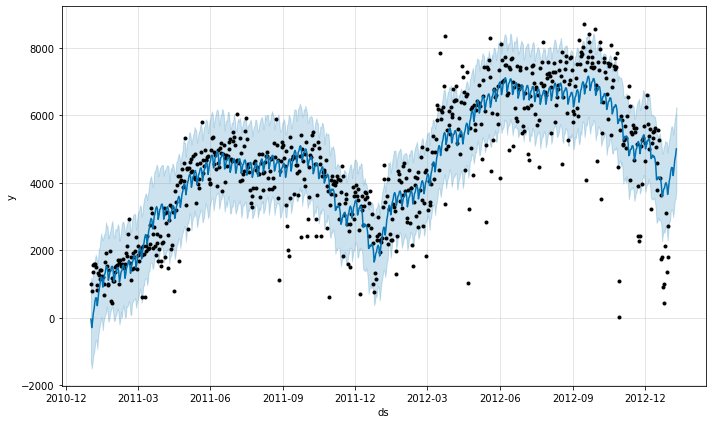

In [9]:
fig1 = m.plot(forecast)

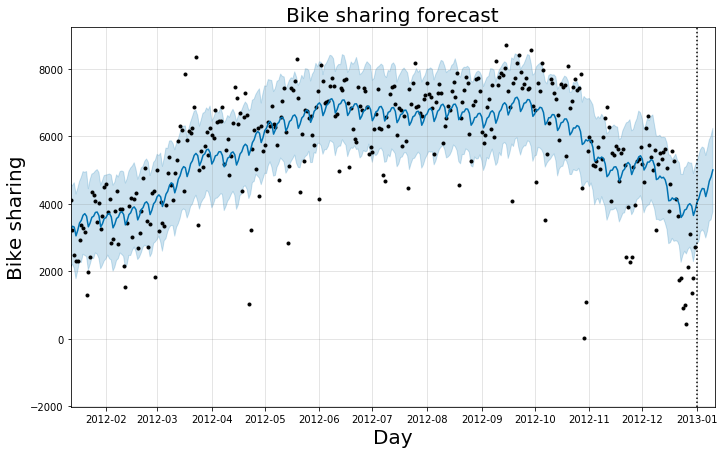

In [10]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2013, 1, 1)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

plt.xlim([datestart, dateend])
plt.title("Bike sharing forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Bike sharing", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

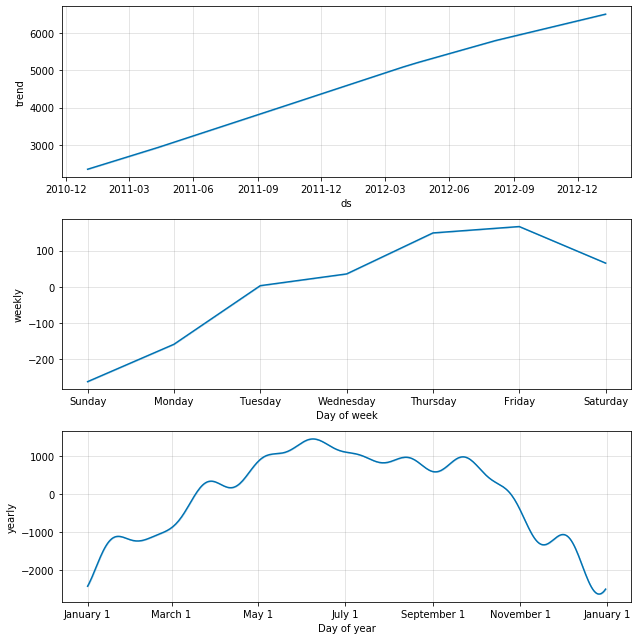

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 23 forecasts with cutoffs between 2012-01-06 00:00:00 and 2012-12-01 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,3 days,1.967537e+06,1402.689042,1024.415705,0.267509,0.594203
1,4 days,1.775714e+06,1332.559244,975.836120,0.251314,0.623188
2,5 days,1.154681e+06,1074.561045,817.449074,0.163284,0.695652
3,6 days,1.034461e+06,1017.084462,761.754475,0.159453,0.753623
4,7 days,1.120424e+06,1058.500865,814.362421,0.181872,0.710145


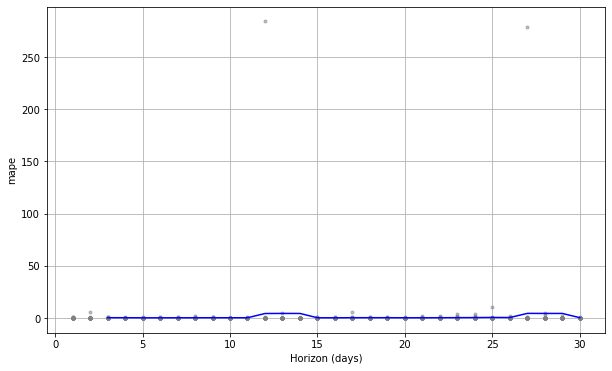

In [13]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')